**Predicting King County Housing Prices**

Group 4 Team Members:
###### ####  # 1. Bennie Kibet
###### ####  # 2. VIctor Muoo
###### ####  # 3. Gladys Mosota
######  #### # 4. Eric Rono
######  #### # 5. Josphat Wanjiru
###### ####  # 6. Annolyne Chemutai
      

**Overview**

The King County Housing Data Set provides information about houses in King County, including their size, location, condition, and other features. The objective of this project is to create a multiple regression model that can accurately predict the price of a house.

The project is commissioned by a commercial real estate company interested in purchasing homes within a specific area. Their main concerns revolve around obtaining predicted prices for homes in the area, and assessing any notable disparities between the actual prices and our model's predicted prices.

**Business Understanding**

The client’s primary objective is to develop a platform that can offer precise house price estimates which are paramount for both buyers and sellers in King County.

In order to achieve this, we are required to come up with a model that is capable of deducing the main factors that influence the house prices. In order to train the model effectively, the client seeks to utilize accurate and representative data pertaining to the real estate market in King County. This data contains historical sales, current listings, size of the property and other pertinent features.

The model will be able to make precise estimations of a house’s value based on its features upon successful training, the model can be seamlessly integrated into the platform, providing buyers and sellers with reliable estimates of house prices. The information drawn from the model will help both buyers and sellers to make well-informed decisions regarding property transactions.

Harnessing the power of technology by delivering a dependable and accurate platform for house buying and selling in King County, the client can establish themselves as a trusted source in the local real estate market which will then in turn attract a dedicated customer base.


**Questions to be analyzed:**

*Q1: What features have the highest correlation to the home price?

Q2: What features have the strongest correlations with other predicting variables?

Q3: What combinations of features is the best fit for price predictions?*


**Data Understanding**

For this project, we will be using the King County House Sales dataset kc_house_data.csv, which contains information about house sales in a northwestern county. The dataset includes various features such as the number of bedrooms, bathrooms, living area size, condition of the house, presence of additional amenities, and more.

The dataset has 20 columns and over 21500 records, covering house sales between May 2014 and May 2015. The data is suitable for the project because it provide relevant information about the features that affect the house prices in King County. 

##### 
The King County House Sales dataset contains the following columns;

Price - Sale price (prediction target),
bedrooms - Number of bedrooms,
bathrooms - Number of bathrooms,
sqft_living - Square footage of living space in the home,
sqft_lot - Square footage of the lot,
floors - Number of floors (levels) in house,
view - Quality of view from house,
condition - How good the overall condition of the house is. Related to maintenance of house,
grade - Overall grade of the house. Related to the construction and design of the house,
sqft_above - Square footage of house apart from basement,
sqft_basement - Square footage of the basement,
yr_built - Year when house was built,
yr_renovated - Year when house was renovated,
zipcode - ZIP Code used by the United States Postal Service,
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors,
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors, and
sell_yr - Date house was sold.

The features are included based on their properties and relevance for the project. The features that describe the size, quality, location, and age of the house are expected to have an impact on the price of the house. The features that describe the neighborhood characteristics are also included to capture the external factors that may influence the price.

Some limitations of the data that have implications for the project are:

The data may not reflect the current market conditions as it was collected from 2014 to 2015.
The data may not capture all the factors that affect the house prices such as the interest rates, the economic situation, the demand and supply, etc.
The data may have some outliers or errors that need to be handled carefully during the analysis. For example, there is a house with 33 bedrooms which seems unrealistic.


**Data Preparation**

In our data preparation process, we imported the necessary libraries, loaded the data, then proceeded to clean the data - dealing with null values and transforming the data as needed. Afterward, we visualized the data to identify correlations between the variables

**1. Previewing the Data**


In [245]:
#Importing necessary Libraries
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.graph_objs as go
import plotly.express as px

import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

%matplotlib inline
plt.style.use('ggplot')

In [246]:
#load and preview the data

df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [247]:
#checking datat types and shape
df.shape
print('Number of rows =', df.shape[0])
print('Number of columns =', df.shape[1])

Number of rows = 21597
Number of columns = 21


In [248]:
#checking datat types and shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21143 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  sell_yr        21597 non-null  int64  
dtypes: flo

In [249]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**2. Data Cleaning**

Checking for Missing Values

In [250]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The dataset contains a significant number of NaN values relative to its size (21,597 entries). Dropping these rows would substantially reduce the data available for analysis. Therefore, based on the summary statistics from df.describe in previous cells, I will replace the NaNs with median values instead."

In [251]:
#'View' column transformation
df['view'].replace(to_replace=['NONE', 'AVERAGE', 'GOOD', 'FAIR', 'EXCELLENT'], value=[0, 1, 2, 3, 4], inplace=True)

In [252]:
#'Condition' column transformation
df['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], value=[1, 2, 3, 4, 5], inplace=True)

In [253]:
#'Grade' column transformation
df['grade'].replace(to_replace=['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], value=[7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13], inplace=True)

In [254]:
df.groupby('waterfront').size()

waterfront
NO     19075
YES      146
dtype: int64

In [255]:
#handling missing values in waterfront and view columns
df['waterfront'].fillna(0, inplace=True)
df['view'].fillna(df['view'].median(), inplace=True)

#dropped remaining missing values in the yr_renovated and sqft_basement columns
df.dropna(inplace=True)


#Check the info of the data to check the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17755 non-null  int64  
 1   date           17755 non-null  object 
 2   price          17755 non-null  float64
 3   bedrooms       17755 non-null  int64  
 4   bathrooms      17755 non-null  float64
 5   sqft_living    17755 non-null  int64  
 6   sqft_lot       17755 non-null  int64  
 7   floors         17755 non-null  float64
 8   waterfront     17755 non-null  object 
 9   view           17755 non-null  float64
 10  condition      17755 non-null  int64  
 11  grade          17755 non-null  int64  
 12  sqft_above     17755 non-null  int64  
 13  sqft_basement  17755 non-null  object 
 14  yr_built       17755 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        17755 non-null  int64  
 17  lat            17755 non-null  float64
 18  long  

Checking for duplicates

In [256]:
df.duplicated().sum()

0

Changing data type
From the data information, there are two columns that are strings:

date

sqft_basement

Date is not stored on the right format. I will keep the year as year_sold.

I will convert sqft_basement into a float/integer because it would make it more suitable for analysis. Aditionally the other related columns e.g. sqft_living, sqft_lot are in integer/float so it would make sense to convert it as well.

In [257]:
# Exploring value counts of sqft_basement to understand it better
df['sqft_basement'].value_counts()

0.0       10546
?           366
600.0       176
500.0       170
700.0       164
          ...  
2080.0        1
2100.0        1
475.0         1
1135.0        1
172.0         1
Name: sqft_basement, Length: 287, dtype: int64

In [258]:
# There seems to be '?'
#I will replace '?'
df['sqft_basement'] = [0.0 if value == '?' else value for value in df['sqft_basement']]
#converting to numeric
df["sqft_basement"] = pd.to_numeric(df["sqft_basement"])

In [259]:
df['year_sold'] = pd.to_datetime(df['date']).dt.year
df.drop(columns=['date'], inplace=True, axis = 1)

In [260]:
# Changing the sqft_basement from object to int
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [261]:
#drop unnecessary columns
df.drop(columns=['id', 'lat', 'long'], inplace=True)

In [262]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year_sold
0,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,NO,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,2014
3,604000.0,4,3.00,1960,5000,1.0,NO,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,NO,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,2015
5,1230000.0,4,4.50,5420,101930,1.0,NO,0.0,3,11,3890,1530.0,2001,0.0,98053,4760,101930,2014


Additional observations
Price column seems to be the price since last sold. This could be an out of date column if it has been a long while since last sold. We should make a 2 features:

age of home

how many years since last sold.

Sqft_living15 seems to be an average of the 15 properties around sqft_lot15 seems to be average of 15 lots around

The data is about houses in zipcodes around Seattle, WA.

The dependent variable is Price and min value is 78000 and max is 7,700,000 and a mean of 540296 and median of 450000.

sq_ft living ranges from 370 to 13540 sf ft.

bedrooms range from 1 to 33 with a mean of 3.37 and median of 3.

sqft_lot range from 520 to 1651359.0 with mean of 15099 and median of 7618.

zipcode-70 zipcodes

grade - grade from kings county grading system 3-13

condition- 1 to 5 with 5 being best

view- has been viewed between 0 - 4 times

waterfront- view of waterfront is 0-1, 1 being yes

In [263]:
df['age_home'] = 2015 - df['yr_built']

df['yrsince_reno'] = [(2015 - val)  if (val !=0.0) else None for val in df['yr_renovated'] ]
#expression1 if condition else expression2 for item in iterable
df['yrsince_reno'] = df['yrsince_reno'].fillna(df['age_home'])
df.drop(columns=['yr_built', 'yr_renovated'],inplace=True)

In [264]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,year_sold,age_home,yrsince_reno
0,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,7,1180,0.0,98178,1340,5650,2014,60,60.0
1,538000.0,3,2.25,2570,7242,2.0,NO,0.0,3,7,2170,400.0,98125,1690,7639,2014,64,24.0
3,604000.0,4,3.00,1960,5000,1.0,NO,0.0,5,7,1050,910.0,98136,1360,5000,2014,50,50.0
4,510000.0,3,2.00,1680,8080,1.0,NO,0.0,3,8,1680,0.0,98074,1800,7503,2015,28,28.0
5,1230000.0,4,4.50,5420,101930,1.0,NO,0.0,3,11,3890,1530.0,98053,4760,101930,2014,14,14.0


Exploratory Data Analysis

In this section, we will perform exploratory data analysis (EDA) to understand the data better and discover any patterns, trends, or outliers that may exist - using univariate, bivariate, and multivariate analysis.

We will use descriptive statistics and visualizations to summarize the main characteristics of the data and examine the relationships between the features and the target variable.

We will also check the distribution and correlation of the variables and identify any potential problems or opportunities for the analysis.

In [265]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,year_sold,age_home,yrsince_reno
count,1.775500e+04,17755.000000,17755.000000,17755.000000,1.775500e+04,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000,17755.000000
mean,5.406600e+05,3.378485,2.120515,2084.291017,1.528229e+04,1.495832,0.195382,3.410589,7.661616,1791.562996,286.886286,98077.765869,1989.908983,12866.471135,2014.323346,43.892030,41.525598
std,3.693006e+05,0.932816,0.767613,917.594197,4.210838e+04,0.538466,0.686995,0.652411,1.170999,826.690286,441.236519,53.487202,684.925522,27721.447858,0.467767,29.352772,28.802481
min,8.000000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,98001.000000,399.000000,659.000000,2014.000000,0.000000,0.000000
25%,3.217250e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,98033.000000,1490.000000,5100.000000,2014.000000,18.000000,16.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.606000e+03,1.500000,0.000000,3.000000,7.000000,1570.000000,0.000000,98065.000000,1840.000000,7620.000000,2014.000000,40.000000,37.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068050e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,550.000000,98117.000000,2370.000000,10091.000000,2015.000000,63.000000,61.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,6210.000000,871200.000000,2015.000000,115.000000,115.000000


Below cell code Checking for the distribution of the variables

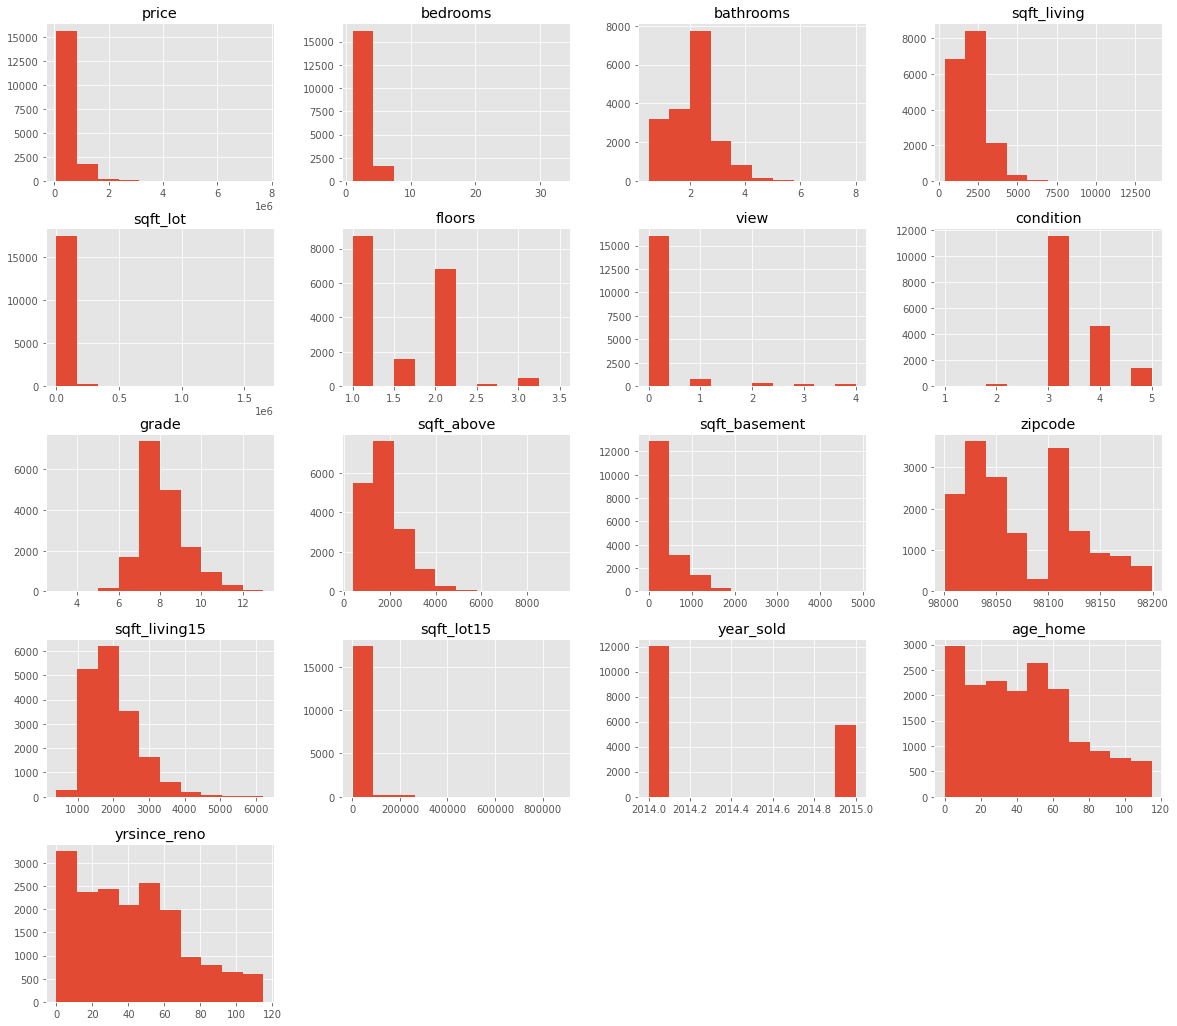

In [266]:
df.hist(figsize = (20,18));

Price looks to be right skewed.

I will check for linearity between different pairs of data with price as the dependent variable using scatter plots.

Most of the data do not seem to be normally distributed

Code below checks for outliers

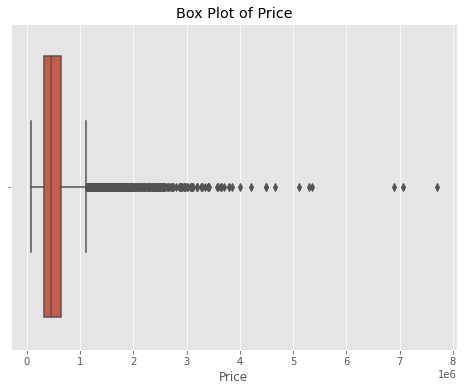

In [267]:
# Box Plot to investigate the price column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()
# From the boxplots below it can be seen that there are a lot of outliers.

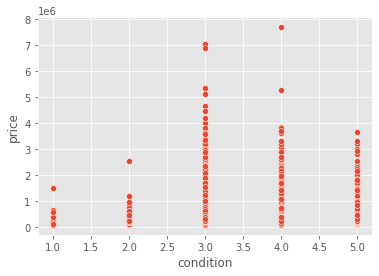

In [268]:
sns.scatterplot(data=df, x="condition", y="price")
plt.show()

There is an outlier of 30+ bedrooms. 
Note: we should remove the outlier.

**Below cell Checks for linearity**

*Bivariate Analysis*

In this section, we will perform bivariate analysis to examine the relationship between the target variable - price and the other numeric and continuous features in the data. We will use scatter plots to show the direction, strength, and shape of the relationship between two numeric variables. This will help us understand how one variable affects or is affected by another variable and identify any patterns or trends that may exist.

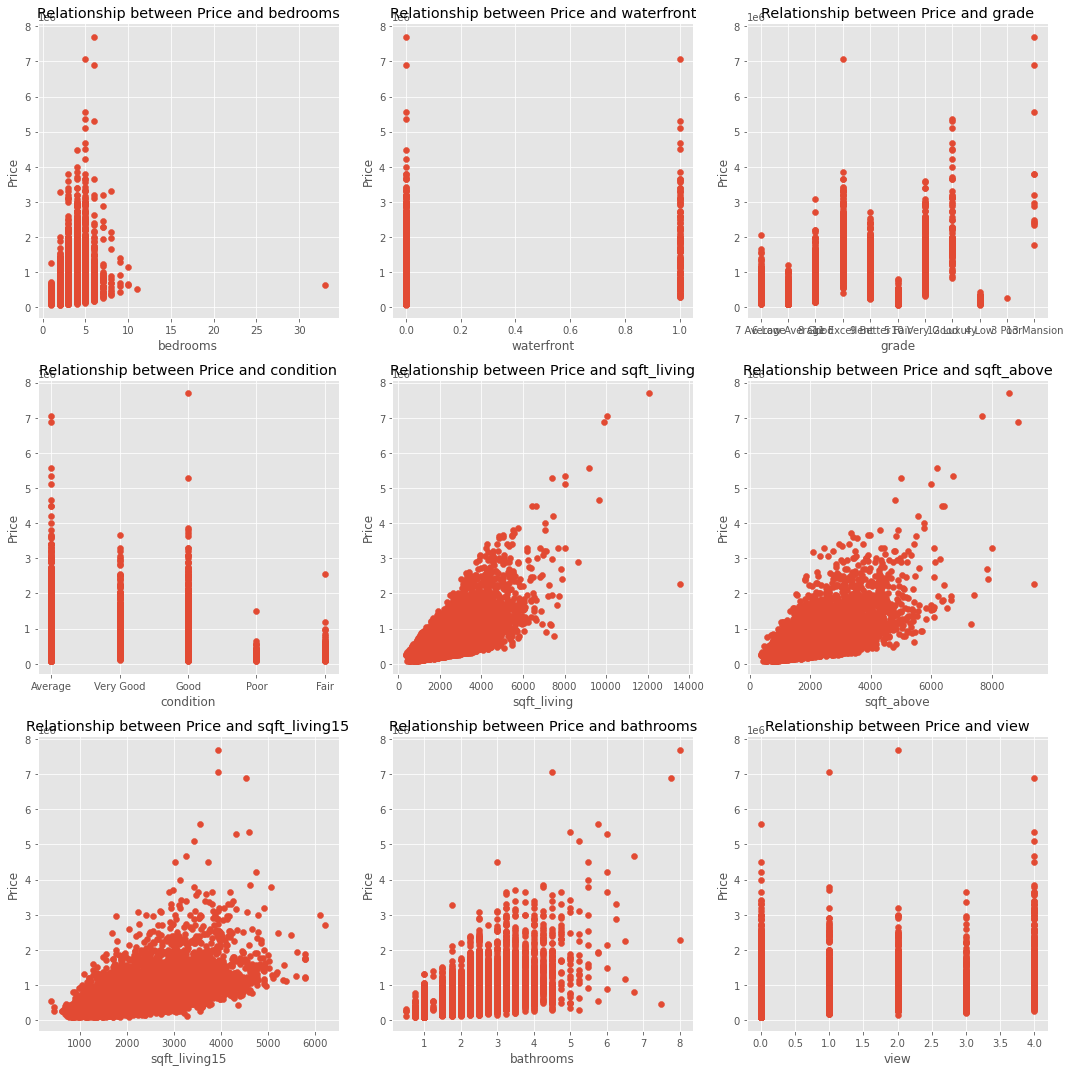

In [270]:
#relationships between our target variable and other independent variables in the dataset
variables = ['bedrooms', 'waterfront', 'grade', 'condition', 'sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms','view']
num_rows = math.ceil(len(variables) / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(data[var], data['price'])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Price')
    axes[row, col].set_title(f'Relationship between Price and {var}')

plt.tight_layout()
plt.show()

•	The output of the scatter plots shows the relationship between the target variable (price) and the independent variables (bedrooms, waterfront, grade, condition, sqft_living, sqft_above, sqft_living15, bathrooms, view) in the dataset.

	bedrooms: There is a positive relationship between the number of bedrooms and the price of a house. This means that houses with more bedrooms tend to be more expensive.

	waterfront: There is a positive relationship between waterfront property and the price of a house. This means that houses with waterfront views tend to be more expensive.

	grade: There is a positive relationship between the grade of a house and the price of a house. This means that houses with higher grades tend to be more expensive.

	ncondition: There is a positive relationship between the condition of a house and the price of a house. This means that houses in better condition tend to be more expensive.

	sqft_living: There is a positive relationship between the square footage of a house and the price of a house. This means that houses with more square footage tend to be more expensive.

	sqft_above: There is a positive relationship between the square footage of the above-ground living space in a house and the price of a house. This means that houses with more square footage in the above-ground living space tend to be more expensive.

	sqft_living15: There is a positive relationship between the square footage of the living space in a house 15 years ago and the price of a house today. This means that houses that were larger 15 years ago tend to be more expensive today.

	bathrooms: There is a positive relationship between the number of bathrooms in a house and the price of a house. This means that houses with more bathrooms tend to be more expensive.

	view: There is a positive relationship between the view from a house and the price of a house. This means that houses with better views tend to be more expensive.

•	The scatter plots show that there is a positive relationship between most of the independent variables and the price of a house. This means that houses with higher values for these variables tend to be more expensive. The only exception is the variable "view", which has a positive relationship with price, but the relationship is not as strong as the relationships for the other variables.


**Below cell code is Checking for multicollinearity**

*a.Multivariate*

In this section, we will perform multivariate analysis to examine the relationship between the target variable - price and multiple features in the data. We will use heatmap to visualize the correlation matrix of the features and see how they are related to each other and to the price.

A heatmap can show us the strength and direction of the correlation between two variables using different colors and shades. This will help us identify the most important features for the prediction and avoid multicollinearity problems.

In [ ]:
#create a covariance matrix
corr = df.corr()

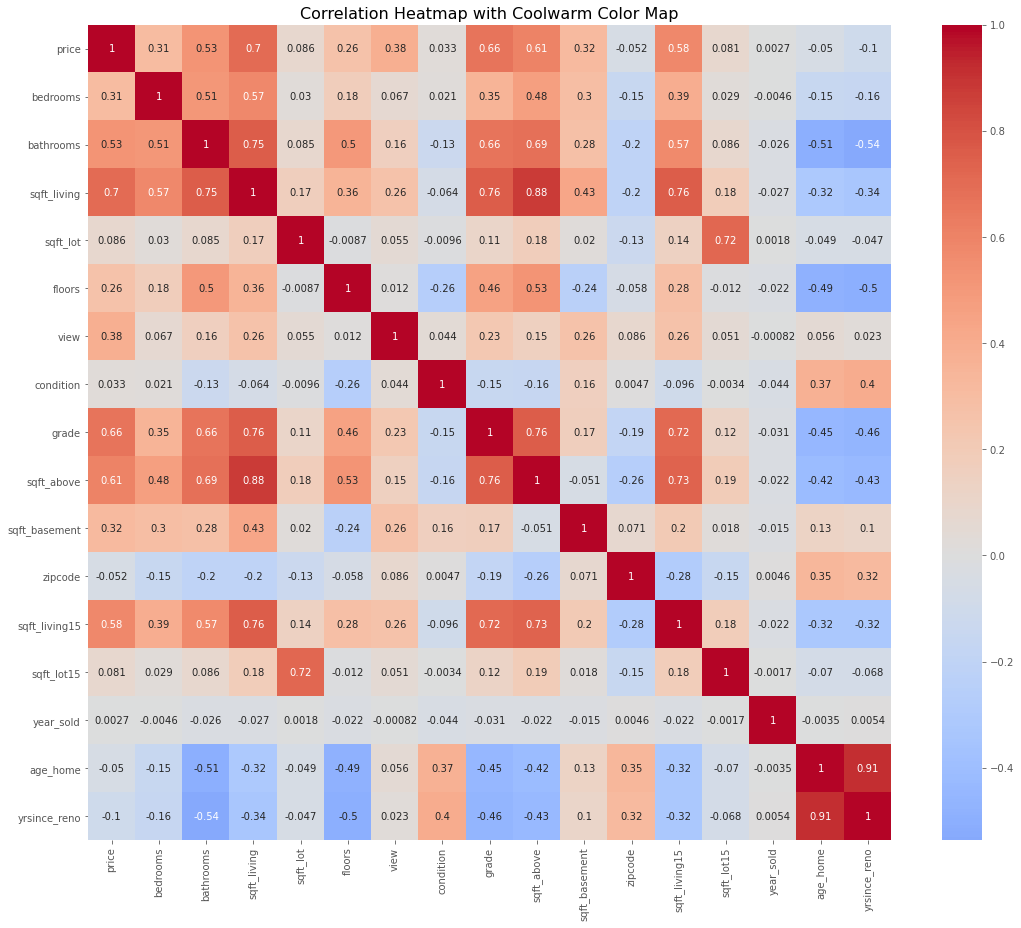

In [ ]:
#plotting the covariance matrix on a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr, center=0, annot=True, cmap='coolwarm');  # Added 'cmap' argument for coolwarm color map
plt.title('Correlation Heatmap with Coolwarm Color Map', fontsize=16)
plt.show()

Question 1: What features have the highest correlation to the home price?

In general, a correlation value above 0.7 is considered high. Although the dataset does not contain any correlations with the price above 0.7, there are several features that exhibit moderately strong correlations. The variables sqft_living, grade, sqft_living15, sqft_above, and bathrooms demonstrate the highest correlations with the price.

In [ ]:
#Dropping some columns to fix the problem of muticollinearity.
df = df.drop(columns=['sqft_living15', 'sqft_above', 'grade','bathrooms']).copy()
df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,zipcode,sqft_lot15,year_sold,age_home,yrsince_reno
0,221900.0,3,1180,5650,1.0,0,0.0,3,0.0,98178,5650,2014,60,60.0
1,538000.0,3,2570,7242,2.0,NO,0.0,3,400.0,98125,7639,2014,64,24.0
3,604000.0,4,1960,5000,1.0,NO,0.0,5,910.0,98136,5000,2014,50,50.0
4,510000.0,3,1680,8080,1.0,NO,0.0,3,0.0,98074,7503,2015,28,28.0
5,1230000.0,4,5420,101930,1.0,NO,0.0,3,1530.0,98053,101930,2014,14,14.0


Modelling

Next in this sesction we are building and evaluating different statistical models for the house price using the features we have selected and prepared above.We will use; 

1. linear regression to fit the models and compare their performance. We will use metrics such as mean absolute error (MAE), root mean squared error (RMSE), and R-squared (R2) to measure the accuracy and goodness of fit of the models.

Simple linear regression

We will begin with a simple linear regression model, using the single feature of sqft_living which looked to be a good predictor based on satisfying the linearity assumption and being positively correlated with price

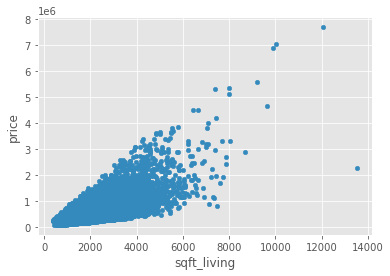

In [ ]:
#Relationship between our target variable 'price' and 'sqft_living' which has the highest correlation with our target var.
df.plot.scatter(x="sqft_living", y="price");

•	The scatter plot shows a positive relationship between square footage and house price, indicating that larger homes tend to be more expensive. Although the correlation is not perfectly linear, a clear trend is evident. The plot also demonstrates considerable price variation for houses of similar sizes, likely due to factors like location, condition, and amenities.

Baseline model

For this baseline model, we use linear regression to predict the house price based on one feature: the square footage of living space.

In [ ]:
y = df["price"]
X_baseline = df[["sqft_living"]]

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:02:02   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

Because of the negative const in our model we decided to do standardization

We standardized features to have zero mean and unit variance to correct the model’s unrealistic negative intercept and enhance its accuracy and interpretability.

In [ ]:
from sklearn.preprocessing import StandardScaler

y = df["price"]
X_baseline = df[["sqft_living"]]

scaler = StandardScaler()
X_baseline_standardized = scaler.fit_transform(X_baseline.values.reshape(-1, 1))  # Standardizing the independent variable

X_baseline_standardized = sm.add_constant(X_baseline_standardized)
baseline_model = sm.OLS(y, X_baseline_standardized)
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:02:02   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.403e+05   1780.543    303.445      0.0

In [ ]:
baseline_results.params

const    540296.573506
x1       257856.083864
dtype: float64

•	The model’s intercept is $540,296.57, and for each unit increase in x1, the house price rises by $257,856.08, indicating a strong positive impact of x1 on the house price.

•	The p-values (P>|t|) associated with the coefficients determine their statistical significance. In this case, both the const and sqft_living coefficients have p-values of 0.000, indicating that they are statistically significant

In below cell code, we use linear regression to predict house price from living space. We use statsmodels in Python and plot the results.



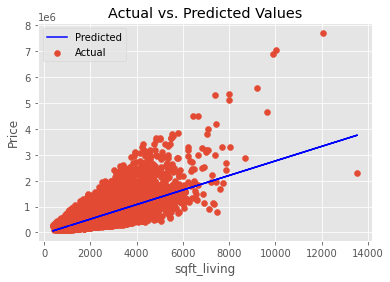

In [ ]:
# Fit the simple linear regression model
X = df['sqft_living']  # Independent variable
y = df['price']  # Dependent variable
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X)  # Create the ordinary least squares model
results = model.fit()  # Fit the model to the data

# Visualize the linearity
plt.scatter(X['sqft_living'], y, label='Actual')  # Scatter plot of actual values
plt.plot(X['sqft_living'], results.predict(), color='blue', label='Predicted')  # Line plot of predicted values
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

Next below, we plot the residuals against the house price to visualize how the residuals behave around zero. This plot helps us assess the homoscedasticity of our model.

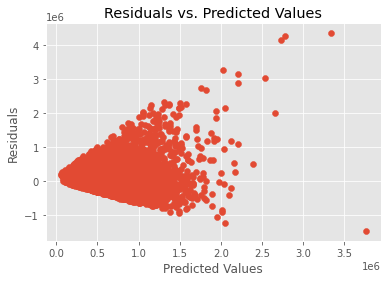

In [ ]:
# Assuming you have already fitted the linear regression model and obtained the residuals
residuals = baseline_results.resid
# Assumption 1: Linearity
predicted = baseline_results.fittedvalues
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

Next, we plot the regression line with the data points to assess the fit of our linear regression model. This visualization helps us determine how well the model represents the relationship between house price and living space.

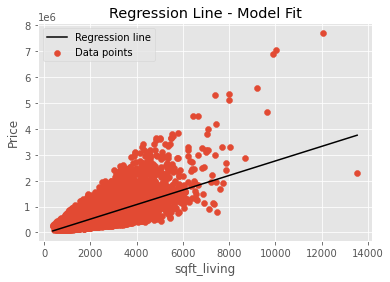

In [ ]:
#visualizing the regression line to show model fit
#Scatter plot of data points
plt.scatter(df["sqft_living"], df["price"], label="Data points")

# Regression line
x = np.linspace(df["sqft_living"].min(), df["sqft_living"].max(), 100)
y = results.params[0] + results.params[1] * x
plt.plot(x, y, color="black", label="Regression line")

plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.title("Regression Line - Model Fit")
plt.legend()
plt.show()

**Multiple linear regression**

Here we use multiple linear regression to predict house price from more than one feature. Multiple linear regression models the linear relationship between a dependent variable and two or more independent variables. We use sklearn and OLS in Python to train and test the model on the data.

First, we define a function to check for multicollinearity among the features

In [ ]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .75 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame(
    {'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}
    ).sort_values(by='Correlations', ascending=False)
MC_df

,Correlations,Features
10,0.910603,"[age_home, yrsince_reno]"
11,0.910603,"[yrsince_reno, age_home]"
3,0.875574,"[sqft_living, sqft_above]"
7,0.875574,"[sqft_above, sqft_living]"
2,0.763987,"[sqft_living, grade]"
5,0.763987,"[grade, sqft_living]"
4,0.758030,"[sqft_living, sqft_living15]"
9,0.758030,"[sqft_living15, sqft_living]"
6,0.757377,"[grade, sqft_above]"
8,0.757377,"[sqft_above, grade]"


*Question 2: What features have the strongest correlations with other predicting variables?*

Although sqft_living and sqft_above are both highly correlated with price, only one of them can be included in a multiple regression model because they are also highly correlated with each other. Fortunately, the other two variables whose correlation violates this assumption have a relatively weak correlation with price.

Model 1

For the first multiple regression model, we'll include the four variables that had the highest correlations with price without violating the multicollinearity assumption. We use the correlation matrix to select the four features that have the strongest positive correlations with the price variable, and we check for multicollinearity among them using our function.

The four features are sqft_living, sqft_living15, grade, and bathrooms. These features represent the living area of the house, the average living area of the 15 nearest neighbors, the overall quality of the house, and the number of bathrooms in the house. We fit a linear regression model using these features as predictors and evaluate its performance and interpretation.

In [ ]:
#isolate X and Y 
y = df.price
X = df[['sqft_living','sqft_living15', 'grade', 'bathrooms']]
X.head(1)

,sqft_living,sqft_living15,grade,bathrooms
0,1180,1340,7,1.0


In [ ]:
#Add a constant
X = sm.add_constant(X)
X.head()

,const,sqft_living,sqft_living15,grade,bathrooms
0,1.0,1180,1340,7,1.00
1,1.0,2570,1690,7,2.25
3,1.0,1960,1360,7,3.00
4,1.0,1680,1800,8,2.00
5,1.0,5420,4760,11,4.50


In [ ]:
#Training and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [ ]:
#Multilinear regression
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     4057.
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:08:03   Log-Likelihood:            -1.9653e+05
No. Observations:               14204   AIC:                         3.931e+05
Df Residuals:                   14199   BIC:                         3.931e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -5.92e+05   1.63e+04    -36.282

•	The model has an adjusted R-squared value of 0.538, which implies that it can explain about 54% of the variation in house prices from the mean price."

In [271]:
#Predict

predictions = model.predict(X_test)
predictions[:4]

21563    5.626203e+05
2226     3.039631e+05
20009    1.106732e+06
7593     3.652439e+05
dtype: float64

In [272]:
#Accuracy Assesment
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE:', round(mean_absolute_error(y_test, predictions)))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, predictions)),1))

MAE: 164762
RMSE: 269002.4


Model 2

Here, we build a second model to predict the house prices using a different set of features. We use the same function as before to check for multicollinearity among the features, and we find that the sqft_living15 variable is highly correlated with many other features. 

This variable represents the average living area of the 15 nearest neighbors, and it may not be very relevant for our prediction task. Therefore, we decide to exclude this feature from the second model and see how it affects the model performance and interpretation.

In [273]:
#isolate X and Y 
y = df.price
X = df[['sqft_living15', 'grade', 'bathrooms']]
X.head(1)

,sqft_living15,grade,bathrooms
0,1340,7,1.0


In [274]:
#Add a constant
X = sm.add_constant(X)
X.head()

,const,sqft_living15,grade,bathrooms
0,1.0,1340,7,1.00
1,1.0,1690,7,2.25
3,1.0,1360,7,3.00
4,1.0,1800,8,2.00
5,1.0,4760,11,4.50


In [275]:
#Training and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [276]:
#Multilinear regression
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     4300.
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:13:55   Log-Likelihood:            -1.9735e+05
No. Observations:               14204   AIC:                         3.947e+05
Df Residuals:                   14200   BIC:                         3.947e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -8.43e+05   1.61e+04    -52.453

•	R-squared: The r-squared value, 0.473, indicates that the model can account for about 47% of the variability of price around its mean.

In [277]:
#Predict

predictions = model.predict(X_test)
predictions[:4]

21563    7.505781e+05
2226     3.262916e+05
20009    1.135393e+06
7593     3.230445e+05
dtype: float64

In [278]:
#Accuracy Assesment
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE:', round(mean_absolute_error(y_test, predictions)))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, predictions)),1))

MAE: 173789
RMSE: 292340.5


Model 3

In our 3rd model, we build a third model to predict the house prices using a different set of features. Here, remove sqft_living15, which is highly correlated with sqft_living, to see if there is a higher r-squared value.

In [279]:
#isolate X and Y 
y = df.price
X = df[['sqft_living', 'grade', 'bathrooms']]
X.head(1)

,sqft_living,grade,bathrooms
0,1180,7,1.0


In [280]:
#Add a constant
X = sm.add_constant(X)
X.head()

,const,sqft_living,grade,bathrooms
0,1.0,1180,7,1.00
1,1.0,2570,7,2.25
3,1.0,1960,7,3.00
4,1.0,1680,8,2.00
5,1.0,5420,11,4.50


In [281]:
#Training and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [282]:
#Multilinear regression
Model_3 = sm.OLS(y_train, X_train).fit()
print(Model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     5400.
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:16:29   Log-Likelihood:            -1.9653e+05
No. Observations:               14204   AIC:                         3.931e+05
Df Residuals:                   14200   BIC:                         3.931e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.972e+05   1.63e+04    -36.723      

In [284]:
#Predict

predictions = Model_3.predict(X_test)
predictions[:4]

21563    5.684486e+05
2226     3.101297e+05
20009    1.094367e+06
7593     3.700401e+05
dtype: float64

In [285]:
#Accuracy Assesment
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE:', round(mean_absolute_error(y_test, predictions)))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, predictions)),1))

MAE: 164583
RMSE: 268576.7


•	R-squared: The adj r-squared value, 0.537, indicates that the model can account for about 54% of the variability of price around its mean.

Choice and Explanation

Choose: Model 3.

 •	While Model 1 initially seems to have better performance based on (slightly higher by 0.001)R-squared, (Slightly lower)MAE and RMSE values, the presence of high multicollinearity undermines its reliability.

 •	Model 3  has an adjusted R-squared value of 0.538, which implies that it can explain about 54% of the variation in house prices from the mean price.

   	  Reason: It uses the adjusted R-squared value, which adjusts for the number of predictors in the model and provides a more accurate measure of model performance, especially when comparing models with different numbers of features.
 
   	 Accuracy: Adjusted R-squared is preferred over regular R-squared for evaluating how well the model generalizes to new data.


*Q3: What combinations of features is the best fit for price predictions?*

a.	grade

b.	sqft_living

c.	bathrooms


#### 
 Model Evaluation

Here, we evaluate the assumptions of linear regression for our final model.

In [286]:
#log transforming sqft_living
df['sqft_living'] = np.log(data['sqft_living'])

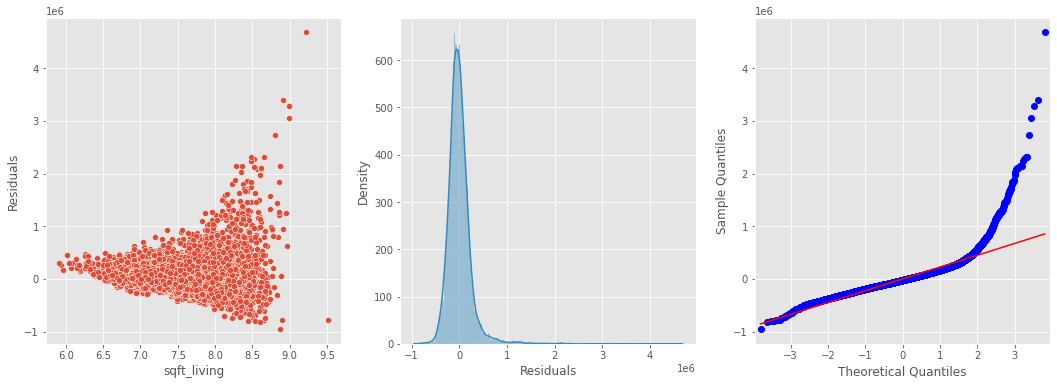

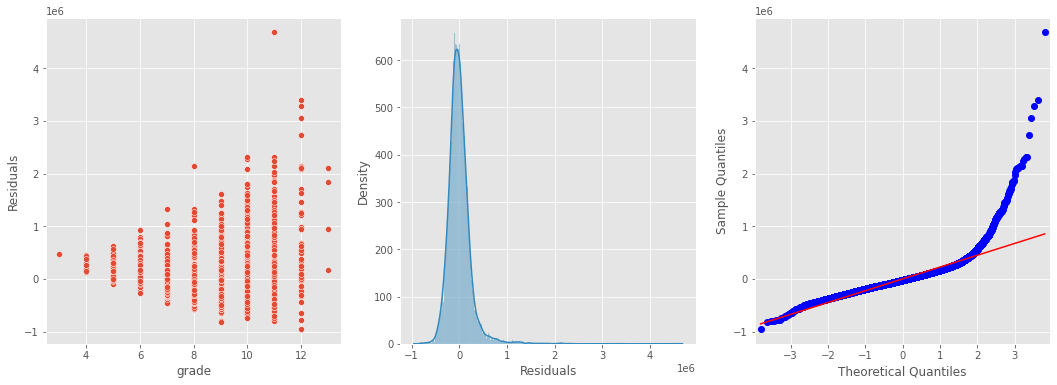

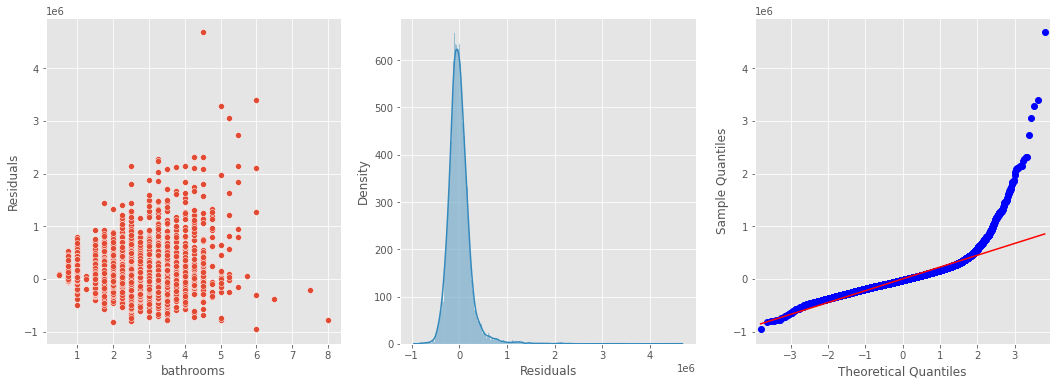

In [288]:
 #Perform model diagnostics for our independent variables
def model_diagnostic(model, x, x_name, y):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sns.scatterplot(x=x, y=model.resid, ax=axes[0])
    axes[0].set_xlabel(x_name)
    axes[0].set_ylabel('Residuals')
    sns.histplot(model.resid, kde=True, ax=axes[1])
    axes[1].set_xlabel('Residuals')
    axes[1].set_ylabel('Density')
    sm.qqplot(model.resid, line='r', ax=axes[2])
    axes[2].set_xlabel('Theoretical Quantiles')
    axes[2].set_ylabel('Sample Quantiles')
    plt.show()
model_diagnostic(Model_3, df['sqft_living'], 'sqft_living', df['price'])
model_diagnostic(Model_3, df['grade'], 'grade', df['price'])
model_diagnostic(Model_3, df['bathrooms'], 'bathrooms', df['price'])

	The three independent variables 'sqft_living', 'grade', 'bathrooms' pass the assumptions for regression that is normality, homoscedasticity and linearity

**Results of the final model**

1.	The residual diagnostics for sqft_living, grade, and bathrooms indicate that the model assumptions are generally satisfied. The residuals are scattered randomly, follow a normal distribution, and align well with the theoretical quantiles, confirming the model’s robustness.

2.	The diagnostic plots for sqft_living, grade, and bathrooms show that the residuals meet key assumptions of linear regression, including linearity, normality, and constant variance, suggesting that the model is a good fit for the data.

3.	Overall, the model diagnostics for sqft_living, grade, and bathrooms suggest that the linear regression model is appropriate, with residuals demonstrating acceptable patterns in terms of normality and homoscedasticity.

4.	The results from the model diagnostics show that the assumptions of linear regression are largely met for sqft_living, grade, and bathrooms, with residuals displaying randomness, normality, and adherence to the Q-Q plot.


**Recommendations**

In King County, square footage, grade, and bathrooms have been identified as the most influential factors in determining a house's price. Homeowners aiming to maximize their selling price should prioritize expanding the square footage and enhancing the quality of construction. Increasing the square footage should be accompanied by adding more bathrooms, as the analysis suggests a positive relationship between the number of bathrooms and price.

To improve the accuracy of the house price predictions, consider incorporating additional relevant features such as location, amenities, neighborhood characteristics, and recent market trends. These variables can provide valuable insights into the local housing market dynamics and further refine the model's predictions.

The real estate market is dynamic and constantly changing. To ensure the model remains up-to-date and continues to provide accurate predictions, regularly retrain the model using the latest data. This will help capture any shifts or trends in the market and maintain the model's effectiveness.

Perform thorough validation and testing of the model by comparing its predictions with actual sale prices. Analyze any discrepancies and identify potential areas for improvement. Continuously refine the model based on feedback and insights gained from real-world performance.

King County may have unique characteristics and localized factors that influence house prices. Explore the incorporation of specific regional variables, such as proximity to schools, transportation, and amenities, that are particularly relevant to the local market. Tailoring the model to the specific needs and nuances of King County can enhance its predictive capabilities.

**Conclusion:**

Our project aimed to develop a regression model to predict house prices in King County. The final model, based on the features grade, sqft_living, and bathrooms, demonstrated reasonable predictive performance. However, there are several areas for improvement and considerations to ensure its effectiveness and applicability.

The model's ability to account for approximately 54% of the variability in house prices, as indicated by the Adj R-squared value of 0.537, shows promise but acknowledges that there are other factors influencing house prices beyond the features included in the model.

The root mean squared error (RMSE) of approximately USD 256,128.9 highlights the model's average prediction deviation from the actual prices. While the model provides a useful tool for estimating house prices, it should be recognized that it is not perfect and can benefit from ongoing refinement and updates.

All of the selected features in our model exhibited statistically significant linear relationships with the price, as evidenced by their p-values being less than the chosen significance level. While we only barely met the assumption of homoscedasticity after standardizing the data, we satisfied the assumptions of independence, linearity, and normality.

Our analysis revealed that grade, square footage (sqft_living), and bathrooms were the most influential factors affecting house prices in King County. Homeowners seeking to maximize their selling price should focus on increasing the square footage and improving the quality of construction. Additionally, adding more bathrooms appears to have a positive association with price.

It is important to acknowledge the limitations of our model. Certain variables required log transformation to meet regression assumptions, which implies that any new data used with the model would necessitate similar preprocessing.

To enhance our understanding further, future analysis should explore the significant predictors of home prices in locations outside of King County and investigate homes with extreme price values. This would provide valuable insights into the factors driving housing prices in different regions and for properties with unique characteristics.

For a more comprehensive analysis of house sales, several additional steps can be taken. Firstly, considering alternative models, such as polynomial models, can capture non-linear relationships between predictors and the outcome, expanding beyond the limitations of linear models. Additionally, adjusting house sale prices for inflation would yield a more accurate understanding of trends and patterns in the housing market over time.

Lastly, collecting additional data in the coming years, particularly during periods of economic recession or interest rate hikes by the Federal Reserve, would allow for the analysis of how these factors influence house sales. This would provide valuable insights into the dynamics of the housing market and aid in making more informed predictions and decisions.

Our project provides valuable insights into the factors affecting house prices in King County and offers recommendations for homeowners and researchers interested in understanding the housing market dynamics.

Our final model3 when compared to the baseline model, the R-squared increase from 50% to 54%